<font color='green' size='6'>**Домашняя работа 1**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных о стоимости недвижимости.

**Описание данных:**

| Признак     | Описание                                                 |
|-------------|-----------------------------------------------------------|
| MedInc      | Средний доход домохозяйства (в десятках тысяч долларов)  |
| HouseAge    | Средний возраст домов в районе                           |
| AveRooms    | Среднее количество комнат на дом                         |
| AveBedrms   | Среднее количество спален на дом                         |
| Population  | Население района                                         |
| AveOccup    | Среднее количество человек на дом                        |

- target - стомиость недвижимости, что и нужно вам предсказать (это и есть целевой признак)

**Что нужно сделать:**

1. Проведите разведочный анализ данных (EDA)

2. Заполнить пропуски любыми 2 способами, что обсуждали на лекции. Объясните свой выбор

3. Построите модель линейной регрессии c помощью LinearRegression.

4. Оцените качество моделей. Выберите ту модель+метод заполнения пропусков, который даёт наилучший результат, и обоснуйте свой выбор.







# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [24]:
import pandas as pd


# <font color='#11a642' size='6'> **Загрузка данных**

In [25]:
# 1. Загрузка датасета
!gdown 1yQgwqFxwkHtZL2PZ2waF4Pg3Sb9hyHo9


Downloading...
From: https://drive.google.com/uc?id=1yQgwqFxwkHtZL2PZ2waF4Pg3Sb9hyHo9
To: /Users/antontravkin/Sites/python_rtk/part 2/Lesson 15/df_with_nan.csv
100%|██████████████████████████████████████| 1.16M/1.16M [00:00<00:00, 5.32MB/s]


In [26]:
df = pd.read_csv('df_with_nan.csv')

In [27]:
df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,8.3252,41.0,6.984127,1.023810,322,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565,2.181467,3.422


In [28]:
# 2. Разделение признаков и целевой переменной
X = df.drop('Target', axis=1)
y = df['Target']

In [29]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

# <font color='#11a642' size='6'> **Разведочный анализ данных**

## <font color='#11a642' size='5'> Оцените размер вашего датасета


1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [30]:
# Сколько ГБ ваш датасет
# ваш код
import os
filename = 'df_with_nan.csv'

# Получаем размер файла в байтах
size_bytes = os.path.getsize(filename)

# Переводим в гигабайты
file_size_gb = size_bytes / (1024 ** 3)

print(f"Размер файла: {file_size_gb:.4f} ГБ")

Размер файла: 0.0011 ГБ


In [31]:
# Сколько строк и столбцов
# ваш код

print(f"Строк: {df.shape[0]}, Столбцов: {df.shape[1]}")

Строк: 20640, Столбцов: 7


## <font color='#11a642' size='5'> Анализ числовых (непрерывных) признаков


- для каждого признака посчитайте минимум, максимум, среднее, медиану

In [32]:
# ваш код
# Оставляем только числовые столбцы

numeric_df = df.select_dtypes(include='number')

# Считаем нужную статистику
summary = pd.DataFrame({
    'min': numeric_df.min(),
    'max': numeric_df.max(),
    'mean': numeric_df.mean(),
    'median': numeric_df.median()
})

# Выводим результат
print(summary)

                 min           max         mean       median
MedInc      0.499900     15.000100     3.870444     3.534900
HouseAge    1.000000     52.000000    28.627660    29.000000
AveRooms    0.846154    141.909091     5.428796     5.228856
AveBedrms   0.333333     34.066667     1.096675     1.048780
Population  3.000000  35682.000000  1425.476744  1166.000000
AveOccup    0.692308   1243.333333     3.070655     2.818116
Target      0.149990      5.000010     2.068558     1.797000


## <font color='#11a642' size='5'> Анализ пропусков


In [33]:
# ваш код

# Количество пропусков в каждом столбце
missing_counts = df.isna().sum()

# Процент пропусков в каждом столбце
missing_percent = (missing_counts / len(df)) * 100

# Собираем в таблицу
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
})

print(missing_summary)

            missing_count  missing_percent
MedInc                 11         0.053295
HouseAge               11         0.053295
AveRooms               15         0.072674
AveBedrms               0         0.000000
Population              0         0.000000
AveOccup                0         0.000000
Target                  0         0.000000


# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [34]:
# ваш код
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3)

print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Размер X_train: (14448, 6)
Размер X_test: (6192, 6)
Размер y_train: (14448,)
Размер y_test: (6192,)


# <font color='#11a642' size='6'> **Подготовка данных к обучению**



1. Обработка пропусков любыми 2 способами, изученных на лекции




In [35]:
# --- Вариант 1: удаление строк с пропусками ---
X_train_dropna = X_train.dropna()
y_train_dropna = y_train.loc[X_train_dropna.index]

y_test_dropna = y_test.loc[X_test.dropna().index]
X_test_dropna = X_test.loc[y_test_dropna.index]

# --- Вариант 2: заполнение медианой ---
X_train_impute = X_train.copy()
X_test_impute = X_test.copy()
for col in X_train.columns:
    median_val = X_train[col].median()
    X_train_impute[col] = X_train[col].fillna(median_val)
    X_test_impute[col] = X_test[col].fillna(median_val)
    X_test_impute[col] = X_test_impute[col].fillna(median_val)

# <font color='#11a642' size='6'> **Построение моделей машинного обучения**

## <font color='#11a642' size='5'> Построение линейной регрессии с помощью LinearRegression


In [36]:
from sklearn.linear_model import LinearRegression

# --- Модель на данных с удалением пропусков ---

# Обучаем модель на данных без пропусков
model_dropna = LinearRegression()
model_dropna.fit(X_train_dropna, y_train_dropna)

# Предсказываем
y_pred_dropna = model_dropna.predict(X_test_dropna)

# Обучаем модель на данных с импутацией
model_impute = LinearRegression()
model_impute.fit(X_train_impute, y_train)

# Предсказываем
y_pred_impute = model_impute.predict(X_test_impute)

### <font color='#11a642' size='4'> Оценка качества  всех моделей


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Для модели с удалением пропусков
mse_dropna = mean_squared_error(y_test_dropna, y_pred_dropna)
r2_dropna = r2_score(y_test_dropna, y_pred_dropna)

print("Модель с удалением пропусков:")
print(f"MSE: {mse_dropna:.4f}")
print(f"R2: {r2_dropna:.4f}")

# Для модели с импутацией (указываем y_test по индексам X_test_impute)
mse_impute = mean_squared_error(y_test.loc[X_test_impute.index], y_pred_impute)
r2_impute = r2_score(y_test.loc[X_test_impute.index], y_pred_impute)

print("\nМодель с импутацией пропусков:")
print(f"MSE: {mse_impute:.4f}")
print(f"R2: {r2_impute:.4f}")

Модель с удалением пропусков:
MSE: 0.6171
R2: 0.5303

Модель с импутацией пропусков:
MSE: 0.6167
R2: 0.5301


# <font color='#11a642' size='4'> Ваши выводы
- какую из моделей вы рекомендуете использовать для прогноза? Почему?



ВАШ ОТВЕТ

In [38]:
# Сравнение
if mse_impute < mse_dropna:
    print("\nИмпутация пропусков дала лучший результат.")
else:
    print("\nУдаление строк с пропусками дало лучший результат.")


Импутация пропусков дала лучший результат.


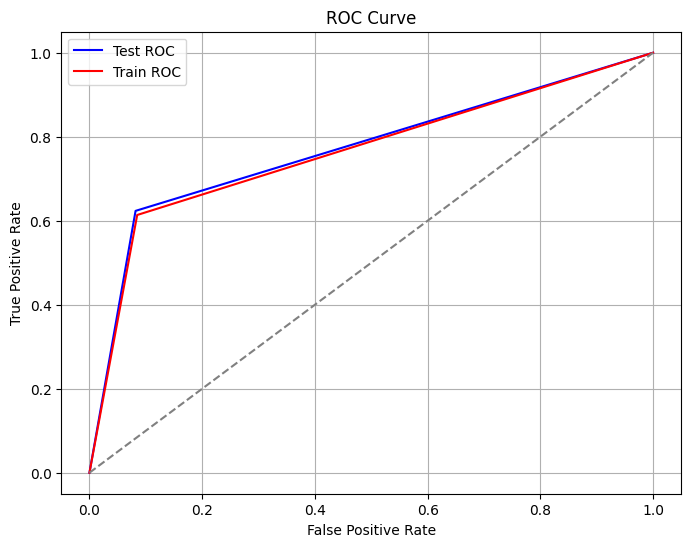

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve

df_dropna = df.dropna()
X_dropna = df_dropna.drop(columns=["Target"])
y_dropna = df_dropna["Target"]

df_impute = df.copy()
for col in df_impute.columns:
    if df_impute[col].isnull().any():
        df_impute[col] = df_impute[col].fillna(df_impute[col].median())

X_impute = df_impute.drop(columns=["Target"])
y_impute = df_impute["Target"]

# Разделение данных
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_dropna, y_dropna, test_size=0.3, random_state=42)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_impute, y_impute, test_size=0.3, random_state=42)

# Линейная регрессия
model_d = LinearRegression().fit(X_train_d, y_train_d)
y_pred_d = model_d.predict(X_test_d)

model_i = LinearRegression().fit(X_train_i, y_train_i)
y_pred_i = model_i.predict(X_test_i)

# Бинаризация таргета (пример)
threshold = 2.5
y_test_bin = (y_test_d > threshold).astype(int)
y_pred_bin = (y_pred_d > threshold).astype(int)

fpr_test, tpr_test, _ = roc_curve(y_test_bin, y_pred_bin)
fpr_train, tpr_train, _ = roc_curve((y_train_d > threshold).astype(int),
                                    (model_d.predict(X_train_d) > threshold).astype(int))

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label="Test ROC", color='blue')
plt.plot(fpr_train, tpr_train, label="Train ROC", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()